## Lab 2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
# spacing in column names
# better to eliminate them
df.columns = df.columns.str.replace(' ','')

### Ans 1

In [4]:
print("Number of records: ", df.shape[0])

Number of records:  149


### Ans 2

In [5]:
# let us apply a sort filter
# first sort according to ReleaseTime and then to ReleaseDate

df.sort_values(by = ['ReleaseTime','ReleaseDate'] , inplace=True ,ascending = False)
df

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
136,137,9-Jan-15,Tevar,N,Action,40,56.0,6132407,11241,1729
25,26,8-Feb-13,Special 26,N,Drama,42,103.0,1829417,6248,568
27,28,8-Feb-13,ABCD _ Any Body Can Dance,N,Drama,12,44.0,4042091,10609,788
14,15,8-Aug-14,Entertainment,N,Comedy,60,163.0,6336058,20472,2843
79,80,7-Nov-14,The Shaukeens,N,Comedy,35,32.5,3395361,8395,1204
...,...,...,...,...,...,...,...,...,...,...
106,107,14-Mar-14,Bewakoofiyan,FS,Romance,22,14.0,2850376,4764,1068
142,143,13-Feb-15,Roy,FS,Romance,40,58.0,7687797,18974,3229
125,126,11-Oct-13,War Chhod Na Yaar,FS,Comedy,14,7.5,40450,33,7
126,127,11-Oct-13,Baat Ban Gayi,FS,Comedy,4,1.5,23186,9,4


In [6]:
#replace 
df.loc[df['ReleaseTime'] == 'LW','ReleaseTime'] = 'LongWeekend'
df.loc[df['ReleaseTime'] == 'FS','ReleaseTime'] = 'FestiveSeason'
df.loc[df['ReleaseTime'] == 'HS','ReleaseTime'] = 'HolidaySeason'
df.loc[df['ReleaseTime'] == 'N','ReleaseTime'] = 'Normal'

In [7]:
df['ReleaseTime'].value_counts()

Normal           99
HolidaySeason    18
FestiveSeason    17
LongWeekend      15
Name: ReleaseTime, dtype: int64

### Ans 3

In [8]:
df.value_counts(df['Genre'])

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
dtype: int64

In [9]:
# we notice that genre has Duplicate values because of errorneous spacing. 
# let us fix that first
df['Genre'] = df['Genre'].str.replace(' ','')
genres = df.value_counts(df['Genre'])
genres

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
dtype: int64

In [10]:
print("Genre with highest releases is: " , genres.index[0])

Genre with highest releases is:  Comedy


### Ans 4

In [11]:
pd.crosstab(index=df['ReleaseTime'],columns=df['Genre'])

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FestiveSeason,3,3,4,3,4
HolidaySeason,3,5,6,3,1
LongWeekend,3,5,1,4,2
Normal,15,23,24,15,22


### Ans 5

In [12]:
#applying delimiter and storing it in a new dataframe
temp = df['ReleaseDate'].str.split('-', expand=True)
temp.columns = ['Day','Month','Year']

#concatenate the two dataframes
temp.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,temp],axis=1)

In [13]:
df['Month'].value_counts(sort = True, ascending=True)

Dec     2
Aug     8
Oct     9
Jun    10
Sep    10
Nov    10
Apr    11
Jul    16
Feb    16
May    18
Mar    19
Jan    20
Name: Month, dtype: int64

In [14]:
months = df['Month'].value_counts(sort = True, ascending=True)
print("Month that saw least amount of release: ", months.index[0])

Month that saw least amount of release:  Dec


<AxesSubplot:>

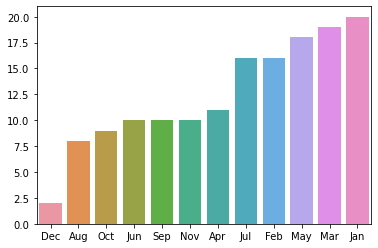

In [15]:
sns.barplot(x = months.index, y = months.values)

### Ans 6

In [16]:
#create a threshold for low budget movie
low_budget = 25
low_budget_movies = df.loc[df['Budget'] <= low_budget]
low_budget_movies_month = low_budget_movies['Month'].value_counts(sort = True , ascending = False)
low_budget_movies_month

May    15
Jan    14
Mar    13
Jul    10
Apr     7
Feb     7
Sep     6
Jun     5
Oct     5
Nov     4
Aug     1
Name: Month, dtype: int64

In [17]:
print("Month that saw MOST amount of low budget releases: ", low_budget_movies_month.index[0])

Month that saw MOST amount of low budget releases:  May


<AxesSubplot:>

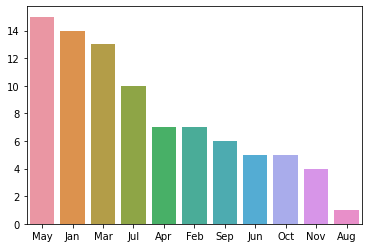

In [18]:
sns.barplot(x = low_budget_movies_month.index, y = low_budget_movies_month.values)

### Ans 7

In [19]:
# calculating ROI
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget'])/df['Budget']
best_roi = df.sort_values(by = 'ROI',ascending=False)[0:10][['MovieName','ROI']]
best_roi.reset_index()

,index,MovieName,ROI
0,44,Aashiqui 2,8.166667
1,128,PK,7.647059
2,108,Grand Masti,7.514286
3,66,The Lunchbox,7.500000
4,86,Fukrey,6.240000
5,12,Mary Kom,5.933333
6,139,Shahid,5.666667
7,93,Humpty Sharma Ki Dulhania,5.500000
8,91,Bhaag Milkha Bhaag,4.466667
9,132,Chennai Express,4.266667


<AxesSubplot:xlabel='ROI', ylabel='MovieName'>

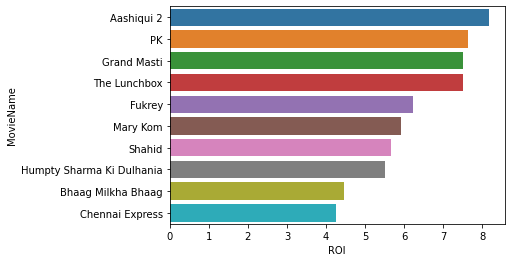

In [20]:
sns.barplot(y = best_roi['MovieName'], x = best_roi['ROI'])

### Ans 8

<AxesSubplot:xlabel='ROI', ylabel='Count'>

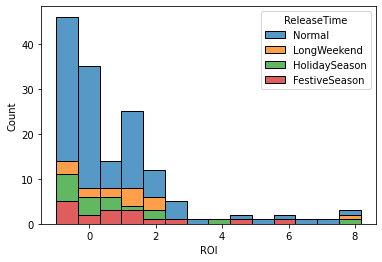

In [21]:
# let us first take a look at the distribution of our data 
# to look for skewnewss
sns.histplot(data = df,x = 'ROI' , hue = 'ReleaseTime',multiple="stack")

In [22]:
# the data is slightly skewed. It is best to consider median of ROI
festive_season = df.loc[df['ReleaseTime'] == 'FestiveSeason']
holiday_season = df.loc[df['ReleaseTime'] == 'HolidaySeason']
long_weekend = df.loc[df['ReleaseTime'] == 'LongWeekend']
normal_season = df.loc[df['ReleaseTime'] == 'Normal']


<AxesSubplot:>

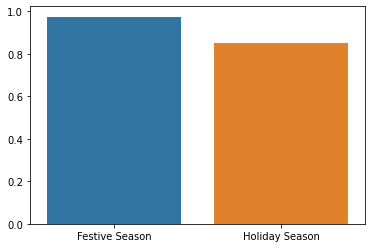

In [23]:
sns.barplot(x = ['Festive Season','Holiday Season'] , y = [festive_season['ROI'].mean(),holiday_season['ROI'].mean()])

<AxesSubplot:>

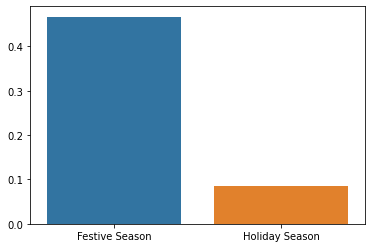

In [24]:
sns.barplot(x = ['Festive Season','Holiday Season'] , y = [festive_season['ROI'].median(),holiday_season['ROI'].median()])

#### On Average,   
Movies have a slightly HIGHER Return on Investment if they are released in Festive Season.  
#### However,  
We observe that over 50% of the movies released in Holiday season do not have a good ROI.  
We can hypotheise that movies released in Holiday Season must have a high advertising budget that brings down their ROI,  
but some movies grossly outperform others to pull up the average. 

In [25]:
df.groupby('ReleaseTime').describe()['ROI'].loc[:,['mean','50%']]

,mean,50%
ReleaseTime,,
FestiveSeason,0.973853,0.466667
HolidaySeason,0.850867,0.084545
LongWeekend,1.127205,1.105263
Normal,0.657722,0.150000


### Ans 9 

In [26]:
print("Correlation between YoutubeLikes and BoxOfficeCollection is: %.4f"
      % df[['YoutubeLikes','BoxOfficeCollection']].corr().iloc[0,1])

Correlation between YoutubeLikes and BoxOfficeCollection is: 0.6825


<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='YoutubeLikes'>

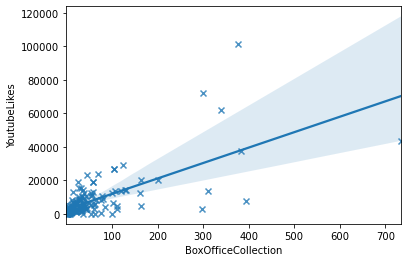

In [27]:
fig, ax = plt.subplots()
sns.regplot(data=df, x='BoxOfficeCollection', y='YoutubeLikes',marker='x')

### moderately correlated.  
The correlation between YoutubeLikes and BoxOfficeCollection is: 0.6825.  
This can be considered to be a moderate level of correlation.  
From the above graph, we observe heteroskedascity in our variables, and the data seems to be prone to outliers.  

### Ans 10

In [28]:
df_copy = df.sort_values(['Genre','YoutubeViews'])

<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

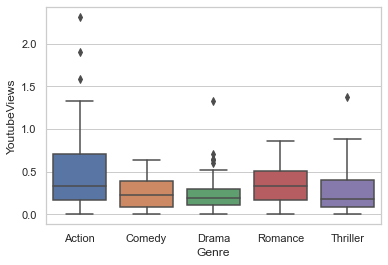

In [29]:
# youtube views are in order of 10^7
# let us scale the column to better suit are needsd
df_copy['YoutubeViews'] = df_copy['YoutubeViews']/10**7

sns.set_theme(style="whitegrid")
sns.boxplot(x = 'Genre' , y = "YoutubeViews" , data = df_copy)

### We observe positive skewness in Action and Thriller Genre.  
This Fits in with the observed notion that Action and Thriller genre appeal to a wide range of Indian Audiences as they tend to gather more social media presence.  
Both of these genres are famous among audiences of all ages and social classes and hence this trend.  

In [30]:
df.groupby('Genre').describe()['BoxOfficeCollection']

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,24.0,91.680833,109.443375,0.09,15.575,56.725,121.25,377.0
Comedy,36.0,46.115000,80.245756,1.50,9.375,27.600,40.00,395.0
Drama,35.0,65.793143,135.210171,0.01,10.000,30.250,60.50,735.0
Romance,25.0,52.841200,66.720696,1.10,10.250,35.500,65.00,311.0
Thriller,29.0,27.936207,33.664628,0.24,4.500,20.000,32.10,162.0


### Ans 11

In [31]:
df_copy = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]
df_corr = df_copy.corr()
df_corr

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


<AxesSubplot:>

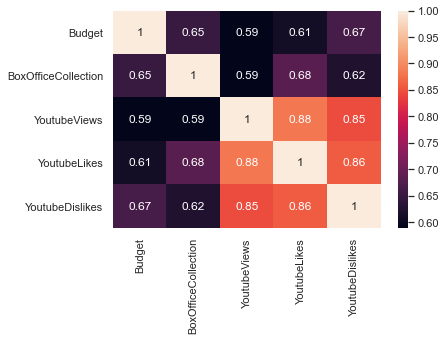

In [32]:
sns.heatmap(df_corr, annot = True)

## Highly Correlated Variables are:  
Youtube Likes & Youtube Dislikes  
Youtube Views & Youtube Dislikes  
Youtube Likes & Youtube Views

### Ans 12

In [33]:
df['Year'].unique()

array(['15', '13', '14'], dtype=object)

In [34]:
df.groupby('Genre').describe()['BoxOfficeCollection']

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,24.0,91.680833,109.443375,0.09,15.575,56.725,121.25,377.0
Comedy,36.0,46.115000,80.245756,1.50,9.375,27.600,40.00,395.0
Drama,35.0,65.793143,135.210171,0.01,10.000,30.250,60.50,735.0
Romance,25.0,52.841200,66.720696,1.10,10.250,35.500,65.00,311.0
Thriller,29.0,27.936207,33.664628,0.24,4.500,20.000,32.10,162.0


(0.0, 4.0)

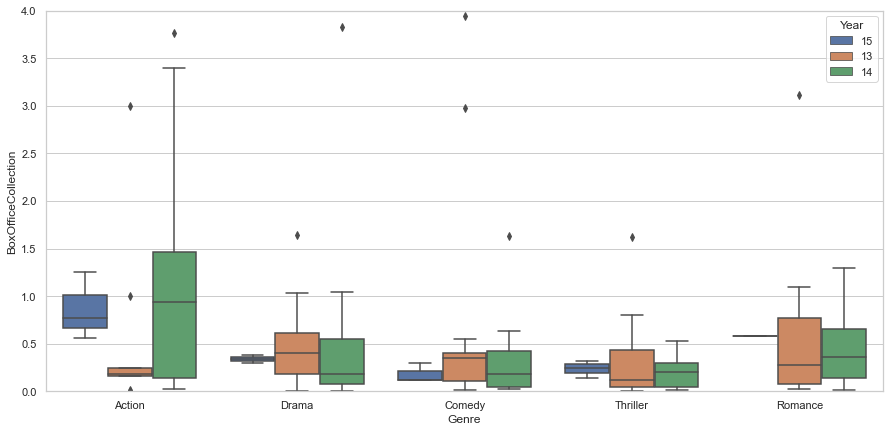

In [35]:
sns.set_theme(style="whitegrid")
df_copy = df.copy()
df_copy['BoxOfficeCollection'] = df_copy['BoxOfficeCollection']/100
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(x = 'Genre' , y = 'BoxOfficeCollection',hue='Year' , data = df_copy)
ax.set_ylim(0,4)

<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='Count'>

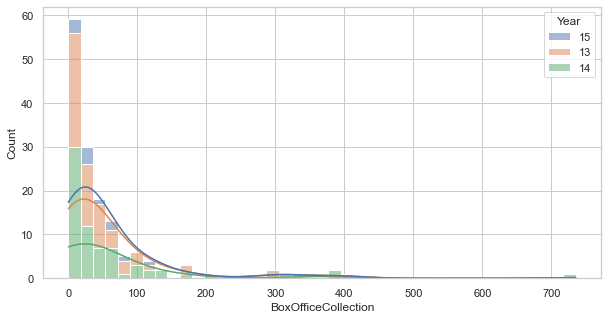

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(data=df, x="BoxOfficeCollection", hue="Year", multiple="stack", kde = True)

### Ans 13

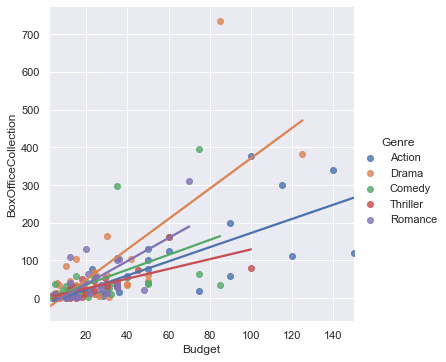

In [37]:
sns.set_style("darkgrid")
sns.lmplot(data=df,x='Budget',y='BoxOfficeCollection',hue='Genre',ci=False)

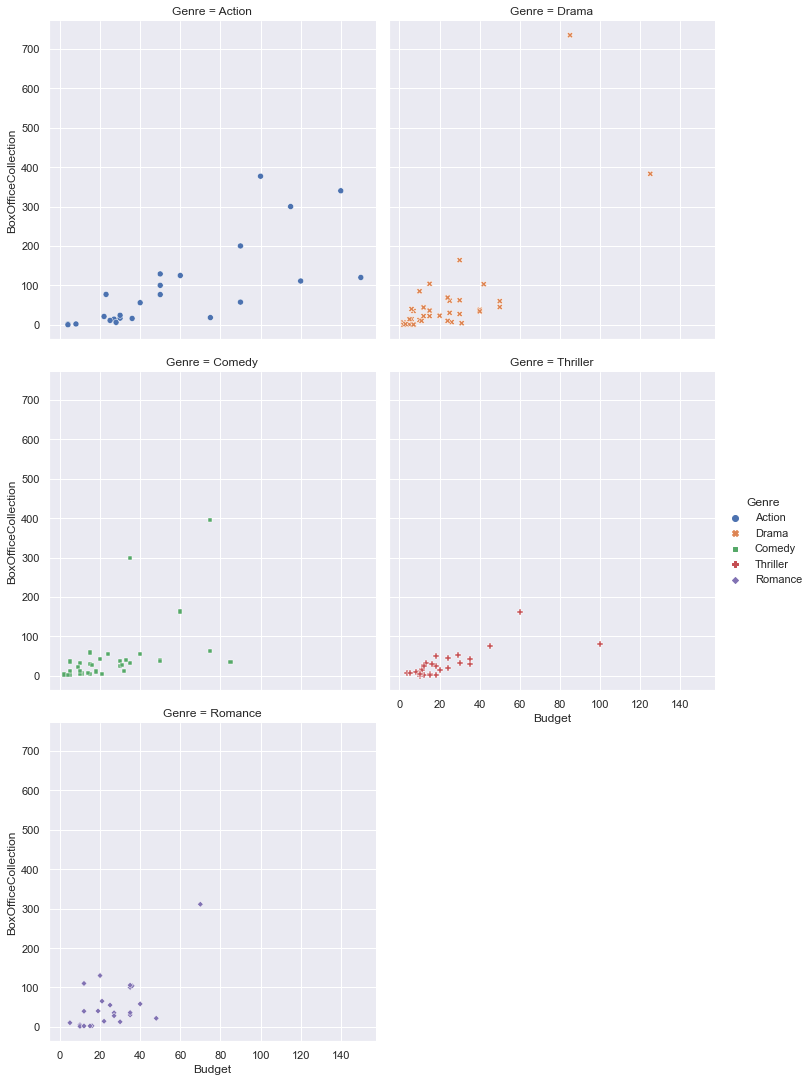

In [38]:
sns.relplot(data=df,x='Budget',y='BoxOfficeCollection',col="Genre",hue='Genre',style='Genre',kind="scatter", col_wrap=2)

### Ans 14

<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='Count'>

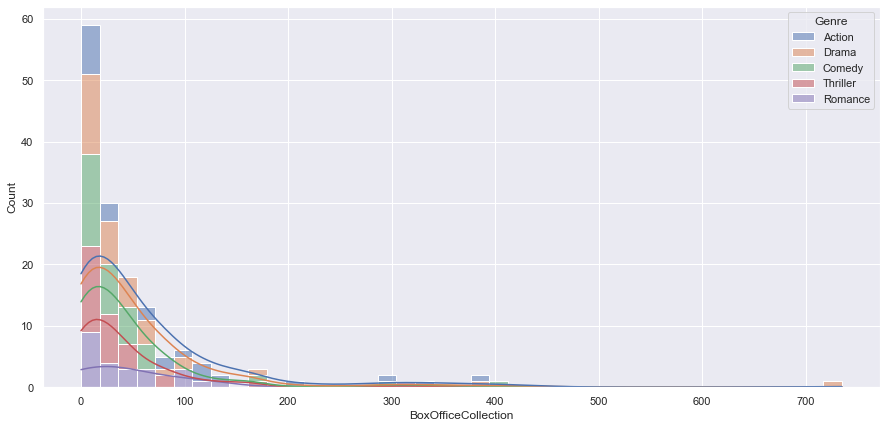

In [39]:
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data=df, x="BoxOfficeCollection", hue="Genre", multiple="stack", kde = True)

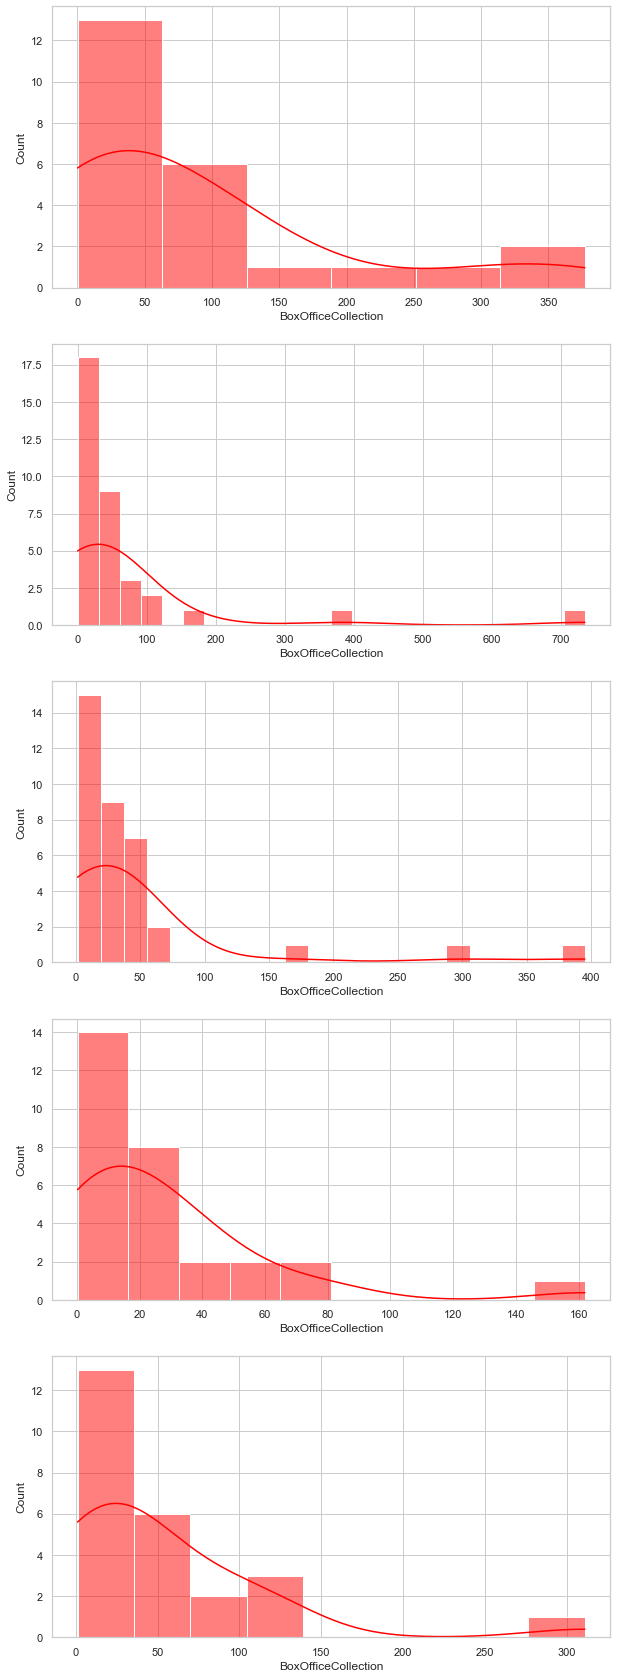

In [40]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(5,1,figsize = (10,30))
for i,genre in enumerate(df['Genre'].unique()):
    sns.histplot(df.loc[df['Genre'] == genre]['BoxOfficeCollection'], kde = True, color ='red', ax = axes[i])

### Ans 15

<AxesSubplot:xlabel='YoutubeViews', ylabel='YoutubeLikes'>

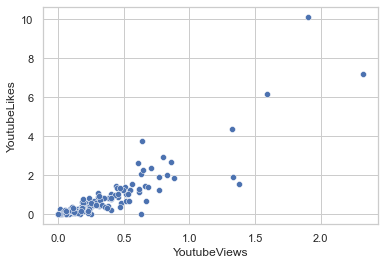

In [41]:
df_copy = df.copy()
df_copy['YoutubeViews'] = df_copy['YoutubeViews']/10**7
df_copy['YoutubeLikes'] = df_copy['YoutubeLikes']/10**4
sns.scatterplot(x = 'YoutubeViews', y = 'YoutubeLikes', data=df_copy)